In [7]:
import requests
import pandas as pd
import json
import LanusStats as ls
from mplsoccer import Pitch
import matplotlib.pyplot as plt

In [2]:
sofascore = ls.SofaScore()

In [3]:
sofascore.get_player_season_heatmap('Euros', '2024', 70996)

,x,y,count
0,89,47,1
1,89,83,1
2,89,63,1
3,89,90,1
4,51,41,1
...,...,...,...
232,41,69,1
233,40,40,1
234,31,33,1
235,77,100,1


In [5]:
df = sofascore.get_player_heatmap('https://www.sofascore.com/belgium-romania/CObsrUb#id:11873980', 'Kevin De Bruyne')

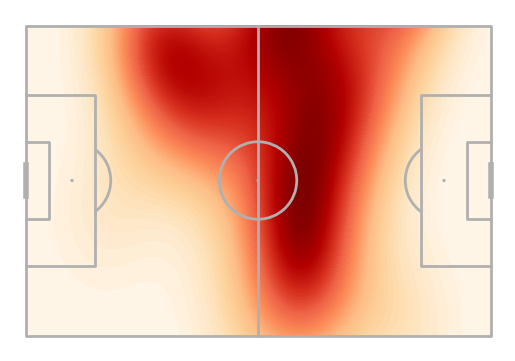

In [16]:
fig, ax = plt.subplots()
pitch = Pitch()
pitch.draw(ax=ax)
pitch.kdeplot(df.x, df.y,ax=ax,
            levels=100,
            shade=True,
            zorder=-1,
            shade_lowest=True,
            cmap='OrRd')
plt.gca().invert_yaxis()

In [25]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36',
    'X-Api-Key': 'ceeee1a5bb209502c6c438abd8f30aef179ce669bb9288f2d1cf2fa276de03f4'
}

In [114]:
response_teams = requests.get('https://matchstats.uefa.com/v1/team-statistics/2036185', headers=headers).json()

In [ ]:
response_teams

In [123]:
ids_equipos = list(pd.DataFrame(response_teams)['teamId'])

In [135]:
df_equipos = pd.DataFrame()
for i in range(2):
    ids_equipos = list(pd.DataFrame(response_teams)['teamId'])
    team_df = pd.DataFrame(pd.DataFrame(response_teams)['statistics'].iloc[i])
    team_df['teamId'] = ids_equipos[i]
    df_equipos = pd.concat([df_equipos, team_df])

In [159]:
df_equipos.name.unique()

array(['shot_in_goal_gate_inner_upper_left',
       'shot_in_goal_gate_inner_upper_center',
       'shot_in_goal_gate_inner_upper_right',
       'shot_in_goal_gate_inner_lower_left',
       'shot_in_goal_gate_inner_lower_center',
       'shot_in_goal_gate_inner_lower_right',
       'shot_in_goal_gate_outer_lower_left',
       'shot_in_goal_gate_outer_upper_left',
       'shot_in_goal_gate_outer_upper_center',
       'shot_in_goal_gate_outer_upper_right',
       'shot_in_goal_gate_outer_lower_right', 'dribbling',
       'dribbling_successful', 'dribbling_accuracy', 'aerialduel',
       'goals', 'attempts', 'attempts_on_target', 'goals_conceded',
       'cross_attempted', 'throw_ins', 'throw_ins_completed',
       'passes_accuracy', 'penalty_scored', 'passes_attempted',
       'goals_scored', 'distance_covered', 'offsides',
       'fouls_committed_in_defensive_third', 'fouls_committed',
       'fouls_suffered', 'yellow_cards', 'red_cards', 'saves', 'corners',
       'corners_left', 'corn

In [111]:
team_df

,name,translations,value,attributes,unit
0,shot_in_goal_gate_inner_upper_left,{'name': {'EN': 'shot in goal gate inner upper...,2,NaN,NaN
1,shot_in_goal_gate_inner_upper_center,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN
2,shot_in_goal_gate_inner_upper_right,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN
3,shot_in_goal_gate_inner_lower_left,{'name': {'EN': 'shot in goal gate inner lower...,0,NaN,NaN
4,shot_in_goal_gate_inner_lower_center,{'name': {'EN': 'shot in goal gate inner lower...,0,NaN,NaN
...,...,...,...,...,...
376,time_spent_high_activity_running_ratio,{'name': {'EN': 'time spent in high activity r...,0.0181833025330454,{'Percentage': '2'},NaN
377,time_spent_sprinting_activity_ratio,{'name': {'EN': 'Ratio of time spent sprinting...,0.00518733380990482,{'Percentage': '1'},NaN
378,matches_appearance,"{'name': {'EN': 'Matches played', 'FR': 'Match...",1,NaN,NaN
379,clean_sheet,"{'name': {'EN': 'Clean sheets', 'FR': 'Sans pr...",0,NaN,NaN


In [49]:
response = requests.get('https://matchstats.uefa.com/v1/player-statistics/2036185', headers=headers)

In [50]:
data = response.json()

In [95]:
pd.DataFrame(data)

,playerId,statistics,teamId
0,103147,[{'name': 'shot_in_goal_gate_inner_upper_left'...,47
1,1905360,"[{'name': 'yellow_cards', 'translations': {'na...",128
2,1905363,"[{'name': 'yellow_cards', 'translations': {'na...",128
3,250003318,"[{'name': 'yellow_cards', 'translations': {'na...",47
4,250004721,[{'name': 'shot_in_goal_gate_inner_upper_left'...,128
5,250005333,"[{'name': 'yellow_cards', 'translations': {'na...",47
6,250005335,[{'name': 'shot_in_goal_gate_inner_upper_left'...,47
7,250007631,"[{'name': 'yellow_cards', 'translations': {'na...",47
8,250011089,[{'name': 'shot_in_goal_gate_inner_upper_left'...,128
9,250017824,"[{'name': 'yellow_cards', 'translations': {'na...",47


In [97]:
df_total_jugadores = pd.DataFrame()
for i in range(len(data)):
    df_jugador = pd.DataFrame(data[i])
    df_jugador_ext = df_jugador['statistics'].apply(pd.Series)
    try:
        df_jugador_atr = df_jugador_ext['attributes'].apply(pd.Series)
    except KeyError:
        continue
    df_jugador_tot = pd.concat([df_jugador, df_jugador_ext, df_jugador_atr],axis=1).drop(columns=['statistics', 'attributes'])
    df_total_jugadores = pd.concat([df_total_jugadores, df_jugador_tot])

In [160]:
df_total_jugadores

,playerId,teamId,name,translations,value,unit,0,Den,Num,DistanceMeters,TotalSeconds,Percentage,TotalMinutesAndSeconds,FieldingPeriodPlayedEntiredTime,FieldingPeriodPlayedTheMost
0,103147,47,shot_in_goal_gate_inner_upper_left,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,103147,47,shot_in_goal_gate_inner_upper_center,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103147,47,shot_in_goal_gate_inner_upper_right,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103147,47,shot_in_goal_gate_inner_lower_left,{'name': {'EN': 'shot in goal gate inner lower...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103147,47,shot_in_goal_gate_inner_lower_center,{'name': {'EN': 'shot in goal gate inner lower...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,97923,47,clean_sheet,"{'name': {'EN': 'Clean sheets', 'FR': 'Sans pr...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,97923,47,player_heatmap_home_possession,{'name': {'EN': 'Heatmap (home team in possess...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,97923,47,player_heatmap_away_possession,{'name': {'EN': 'Heatmap (away team in possess...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
341,97923,47,average_player_position,"{'name': {'EN': 'average player position', 'FR...","3579.7,-8.4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True


In [141]:
response = requests.get('https://match.uefa.com/v5/matches/2036185/lineups', headers=headers)

In [142]:
df_total = pd.DataFrame()
for team in ['home', 'away']:
    for players in ['bench', 'field']:
        placeholder = pd.DataFrame(response.json()[f'{team}Team'][players])['player'].apply(pd.Series)[['fieldPosition', 'internationalName','id', 'nationalTeamId', 'countryCode']]
        df_total = pd.concat([df_total, placeholder])

In [143]:
df_total

,fieldPosition,internationalName,id,nationalTeamId,countryCode
0,GOALKEEPER,Yvon Mvogo,250026983,128,SUI
1,GOALKEEPER,Gregor Kobel,250069832,128,SUI
2,DEFENDER,Leonidas Stergiou,250119144,128,SUI
3,DEFENDER,Nico Elvedi,250055734,128,SUI
4,MIDFIELDER,Denis Zakaria,250079677,128,SUI
5,FORWARD,Noah Okafor,250101696,128,SUI
6,MIDFIELDER,Renato Steffen,250060817,128,SUI
7,MIDFIELDER,Steven Zuber,1905363,128,SUI
8,DEFENDER,Cédric Zesiger,250105729,128,SUI
9,MIDFIELDER,Vincent Sierro,250089058,128,SUI


In [82]:
pd.DataFrame(response.json()['homeTeam']['bench'])['player'].apply(pd.Series)

,age,birthDate,clubId,clubJerseyNumber,clubShirtName,countryCode,detailedFieldPosition,fieldPosition,gender,height,id,imageUrl,internationalName,nationalFieldPosition,nationalJerseyNumber,nationalShirtName,nationalTeamId,translations,weight,countryOfBirthCode
0,30,1994-06-06,68499,38,Mvogo,SUI,GOALKEEPER,GOALKEEPER,MALE,188.0,250026983,https://img.uefa.com/imgml/TP/players/3/2024/3...,Yvon Mvogo,GOALKEEPER,12,Mvogo,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",88.0,NaN
1,26,1997-12-06,52758,1,Kobel,SUI,GOALKEEPER,GOALKEEPER,MALE,NaN,250069832,https://img.uefa.com/imgml/TP/players/3/2024/3...,Gregor Kobel,GOALKEEPER,21,Kobel,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",NaN,SUI
2,22,2002-03-03,50107,4,Stergiou,SUI,NaN,DEFENDER,MALE,NaN,250119144,https://img.uefa.com/imgml/TP/players/3/2024/3...,Leonidas Stergiou,DEFENDER,2,Stergiou,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",NaN,SUI
3,27,1996-09-30,52757,30,Elvedi,SUI,CENTRE_BACK,DEFENDER,MALE,188.0,250055734,https://img.uefa.com/imgml/TP/players/3/2024/3...,Nico Elvedi,DEFENDER,4,Elvedi,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",83.0,SUI
4,27,1996-11-20,50023,20,Zakaria,SUI,CENTRAL_MIDFIELDER,MIDFIELDER,MALE,191.0,250079677,https://img.uefa.com/imgml/TP/players/3/2024/3...,Denis Zakaria,MIDFIELDER,6,Zakaria,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",76.0,NaN
5,24,2000-05-24,50058,17,Okafor,SUI,WINGER,FORWARD,MALE,NaN,250101696,https://img.uefa.com/imgml/TP/players/3/2024/3...,Noah Okafor,FORWARD,9,Okafor,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",NaN,SUI
6,32,1991-11-03,8538,11,Steffen,SUI,WINGER,MIDFIELDER,MALE,170.0,250060817,https://img.uefa.com/imgml/TP/players/3/2024/3...,Renato Steffen,MIDFIELDER,11,Steffen,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",65.0,SUI
7,32,1991-08-17,50129,10,Zuber,SUI,WINGER,MIDFIELDER,MALE,181.0,1905363,https://img.uefa.com/imgml/TP/players/3/2024/3...,Steven Zuber,MIDFIELDER,14,Zuber,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",NaN,SUI
8,25,1998-06-24,64332,5,Zesiger,SUI,CENTRE_BACK,DEFENDER,MALE,NaN,250105729,https://img.uefa.com/imgml/TP/players/3/2024/3...,Cédric Zesiger,DEFENDER,15,Zesiger,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",NaN,SUI
9,28,1995-10-08,52934,8,SIERRO,SUI,CENTRAL_MIDFIELDER,MIDFIELDER,MALE,NaN,250089058,https://img.uefa.com/imgml/TP/players/3/2024/3...,Vincent Sierro,MIDFIELDER,16,Sierro,128,"{'countryName': {'EN': 'Switzerland', 'FR': 'S...",NaN,NaN


In [155]:
df_equipos.merge(df_total[['nationalTeamId', 'countryCode']], left_on='teamId', right_on='nationalTeamId').drop_duplicates(subset=['name', 'teamId', 'nationalTeamId']).reset_index(drop=True)

,name,translations,value,attributes,unit,teamId,nationalTeamId,countryCode
0,shot_in_goal_gate_inner_upper_left,{'name': {'EN': 'shot in goal gate inner upper...,2,NaN,NaN,128,128,SUI
1,shot_in_goal_gate_inner_upper_center,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN,128,128,SUI
2,shot_in_goal_gate_inner_upper_right,{'name': {'EN': 'shot in goal gate inner upper...,0,NaN,NaN,128,128,SUI
3,shot_in_goal_gate_inner_lower_left,{'name': {'EN': 'shot in goal gate inner lower...,0,NaN,NaN,128,128,SUI
4,shot_in_goal_gate_inner_lower_center,{'name': {'EN': 'shot in goal gate inner lower...,0,NaN,NaN,128,128,SUI
...,...,...,...,...,...,...,...,...
755,time_spent_high_activity_running_ratio,{'name': {'EN': 'time spent in high activity r...,0.0163984121529787,{'Percentage': '2'},NaN,47,47,GER
756,time_spent_sprinting_activity_ratio,{'name': {'EN': 'Ratio of time spent sprinting...,0.00551884844878453,{'Percentage': '1'},NaN,47,47,GER
757,matches_appearance,"{'name': {'EN': 'Matches played', 'FR': 'Match...",1,NaN,NaN,47,47,GER
758,clean_sheet,"{'name': {'EN': 'Clean sheets', 'FR': 'Sans pr...",0,NaN,NaN,47,47,GER


In [103]:
df_jugadores_final = df_total_jugadores.merge(df_total, left_on='playerId', right_on='id')

In [156]:
df_jugadores_final.name.unique()

array(['shot_in_goal_gate_inner_upper_left',
       'shot_in_goal_gate_inner_upper_center',
       'shot_in_goal_gate_inner_upper_right',
       'shot_in_goal_gate_inner_lower_left',
       'shot_in_goal_gate_inner_lower_center',
       'shot_in_goal_gate_inner_lower_right',
       'shot_in_goal_gate_outer_lower_left',
       'shot_in_goal_gate_outer_upper_left',
       'shot_in_goal_gate_outer_upper_center',
       'shot_in_goal_gate_outer_upper_right',
       'shot_in_goal_gate_outer_lower_right', 'dribbling',
       'dribbling_successful', 'dribbling_accuracy', 'aerialduel',
       'goals', 'attempts', 'attempts_on_target', 'goals_conceded',
       'cross_attempted', 'throw_ins', 'throw_ins_completed',
       'passes_accuracy', 'penalty_scored', 'passes_attempted',
       'distance_covered', 'offsides',
       'fouls_committed_in_defensive_third', 'fouls_committed',
       'fouls_suffered', 'yellow_cards', 'red_cards', 'saves', 'corners',
       'corners_left', 'corners_right', 'att

In [110]:
df_jugadores_final[df_jugadores_final['name'] == 'player_heatmap']

,playerId,teamId,name,translations,value,unit,0,Den,Num,DistanceMeters,TotalSeconds,Percentage,TotalMinutesAndSeconds,FieldingPeriodPlayedEntiredTime,FieldingPeriodPlayedTheMost,fieldPosition,internationalName,id,nationalTeamId
346,103147,47,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDFIELDER,Toni Kroos,103147,47
691,250004721,128,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDFIELDER,Granit Xhaka,250004721,128
1037,250005335,47,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDFIELDER,İlkay Gündoğan,250005335,47
1381,250011089,128,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,4,5,1,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFENDER,Ricardo Rodríguez,250011089,128
1728,250023097,128,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,2,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDFIELDER,Remo Freuler,250023097,128
2074,250028211,47,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFENDER,Antonio Rüdiger,250028211,47
2091,250029535,47,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIDFIELDER,Pascal Gross,250029535,47
2433,250041844,47,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FORWARD,Niclas Füllkrug,250041844,47
2778,250042877,128,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFENDER,Silvan Widmer,250042877,128
3124,250050401,128,player_heatmap,"{'name': {'EN': 'Heatmap', 'FR': 'Zone d'activ...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEFENDER,Fabian Schär,250050401,128
